In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 1.9
zmax = 3.5

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_Lya, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_3000_zmin_1.9_zmax_3.5.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

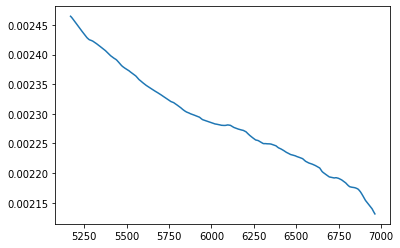

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:26<00:00,  4.79it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

3.2520484849731363e-10 3.2520484849731363e-10


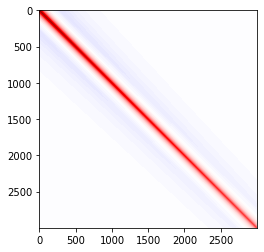

3.2552244449051487e-10 3.2552244449051487e-10


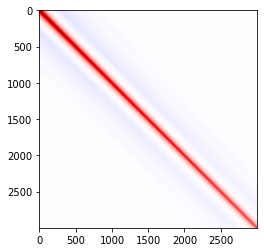

3.258595901528001e-10 3.258595901528001e-10


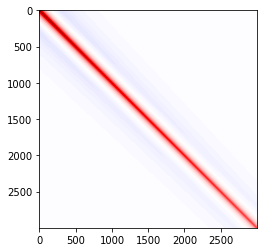

3.262162689794505e-10 3.262162689794505e-10


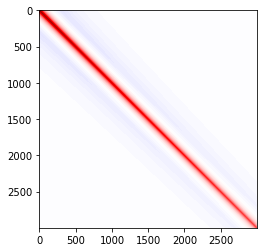

3.2659218751053945e-10 3.2659218751053945e-10


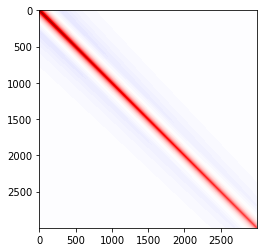

3.269867134727927e-10 3.269867134727927e-10


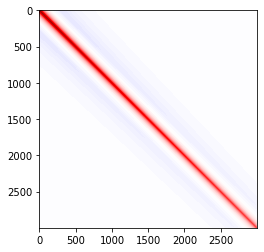

3.2739879751735435e-10 3.2739879751735435e-10


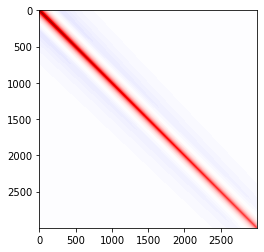

3.278269050637291e-10 3.278269050637291e-10


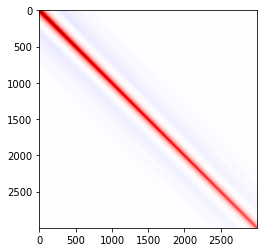

3.2826893264568765e-10 3.2826893264568765e-10


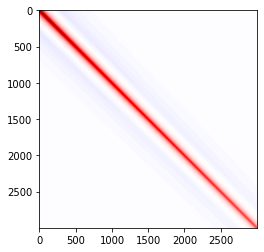

3.2872210985158515e-10 3.2872210985158515e-10


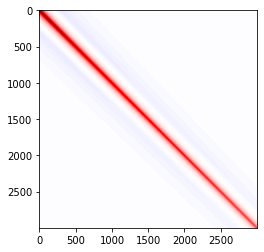

3.2918289578792553e-10 3.2918289578792553e-10


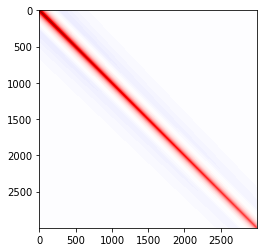

3.29646862164233e-10 3.29646862164233e-10


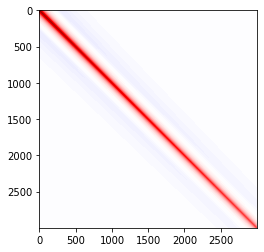

3.301085686510717e-10 3.301085686510717e-10


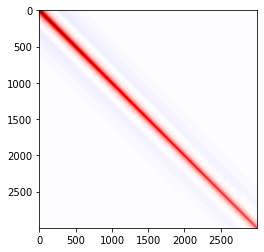

3.3056143142884977e-10 3.3056143142884977e-10


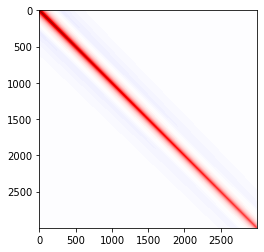

3.309975799343421e-10 3.309975799343421e-10


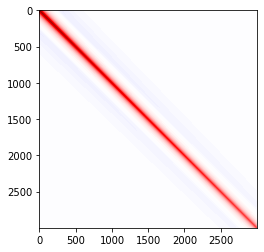

3.314077088932569e-10 3.314077088932569e-10


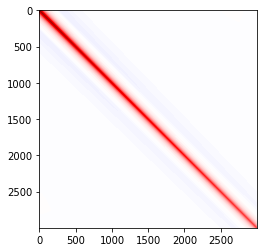

3.317809332118448e-10 3.317809332118448e-10


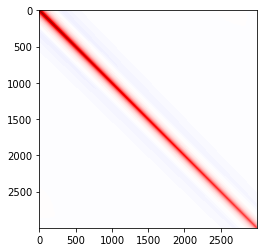

3.321046331337958e-10 3.321046331337958e-10


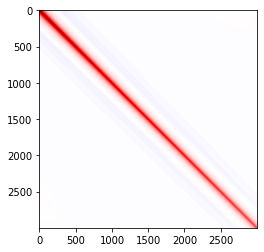

3.323643162083377e-10 3.323643162083377e-10


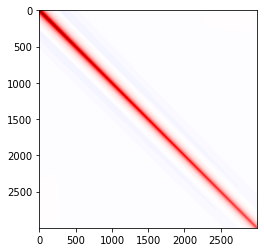

3.3254348926920543e-10 3.3254348926920543e-10


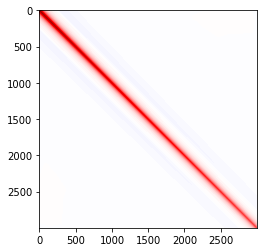

3.326235555005004e-10 3.326235555005004e-10


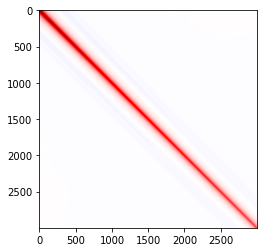

3.325837452140277e-10 3.325837452140277e-10


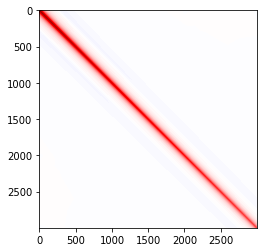

3.3240110635707677e-10 3.3240110635707677e-10


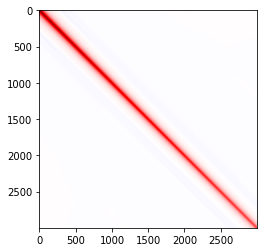

3.3205055765171744e-10 3.3205055765171744e-10


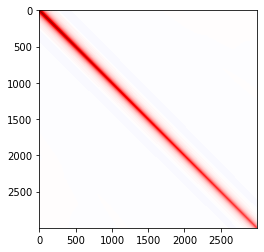

3.31505044796197e-10 3.31505044796197e-10


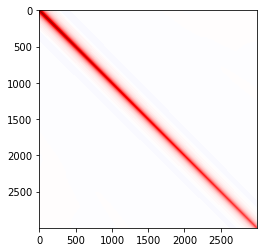

3.3073580675594714e-10 3.3073580675594714e-10


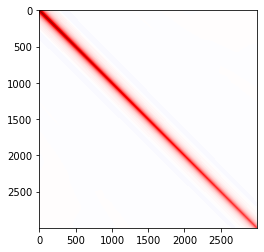

3.29712808039278e-10 3.29712808039278e-10


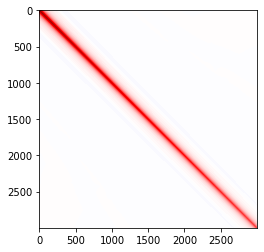

3.284053414531653e-10 3.284053414531653e-10


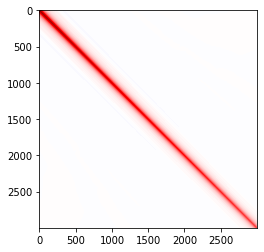

3.2678283844555906e-10 3.2678283844555906e-10


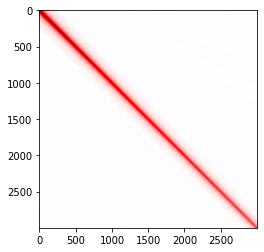

3.248159362148692e-10 3.248159362148692e-10


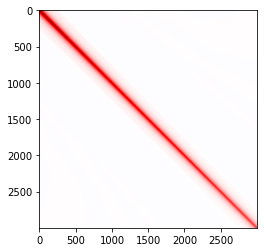

3.2247777388081535e-10 3.2247777388081535e-10


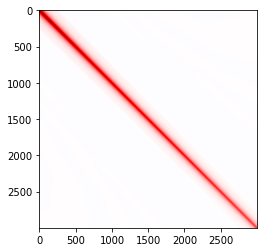

3.197455644321407e-10 3.197455644321407e-10


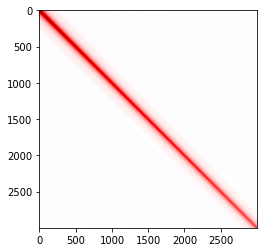

3.166023588932215e-10 3.166023588932215e-10


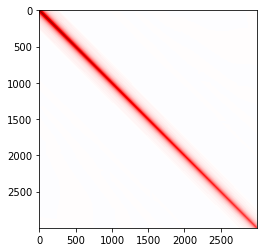

3.1303901180878765e-10 3.1303901180878765e-10


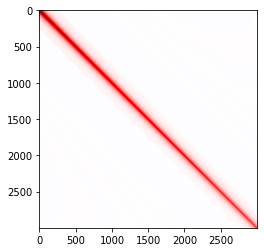

3.090561419840124e-10 3.090561419840124e-10


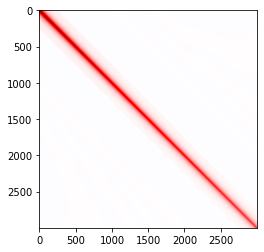

3.0466599050626805e-10 3.0466599050626805e-10


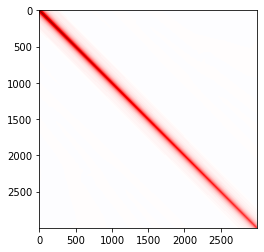

2.998938831128866e-10 2.998938831128866e-10


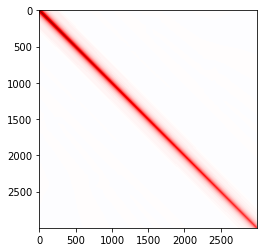

2.947789504079498e-10 2.947789504079498e-10


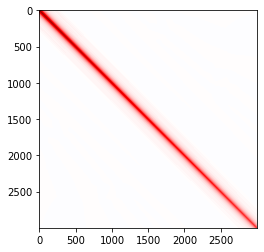

2.89373719944085e-10 2.89373719944085e-10


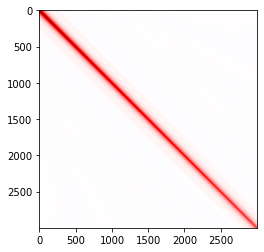

2.837420152800249e-10 2.837420152800249e-10


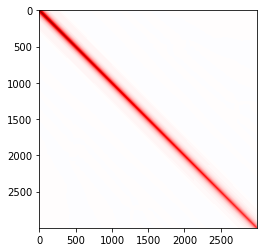

2.779544619208704e-10 2.779544619208704e-10


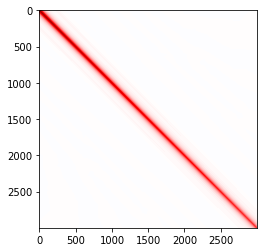

2.7207694322413483e-10 2.7207694322413483e-10


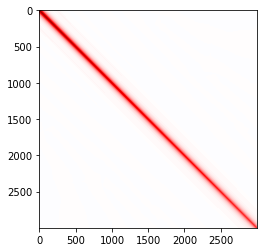

2.6618623772293735e-10 2.6618623772293735e-10


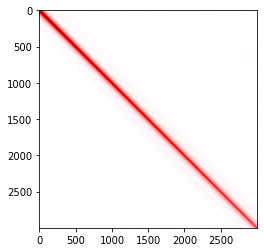

2.603544669536664e-10 2.603544669536664e-10


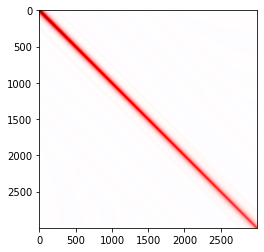

2.5460813467278465e-10 2.5460813467278465e-10


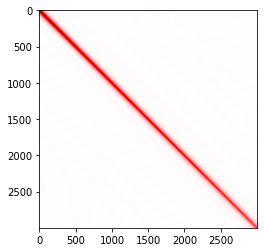

2.489274402337347e-10 2.489274402337347e-10


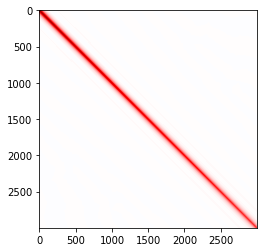

2.4324740944815023e-10 2.4324740944815023e-10


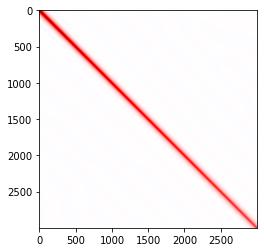

2.3747046273064463e-10 2.3747046273064463e-10


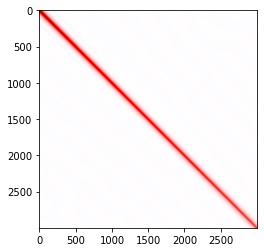

2.314920611544019e-10 2.314920611544019e-10


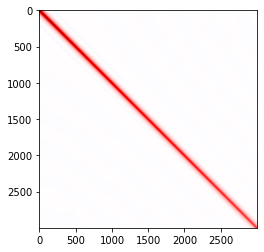

2.2512436363377822e-10 2.2512436363377822e-10


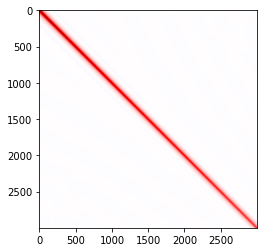

2.1815933261440096e-10 2.1815933261440096e-10


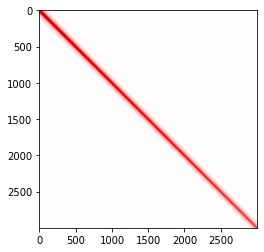

2.1051850820461779e-10 2.1051850820461779e-10


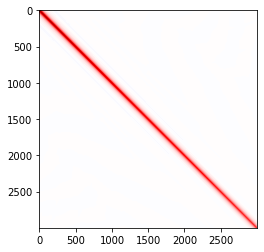

2.022148160067525e-10 2.022148160067525e-10


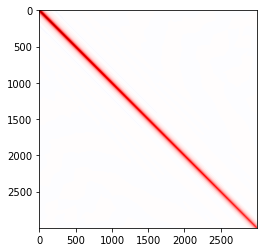

1.9343422330412323e-10 1.9343422330412323e-10


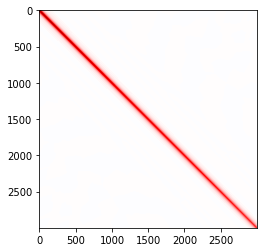

1.8451528284489146e-10 1.8451528284489146e-10


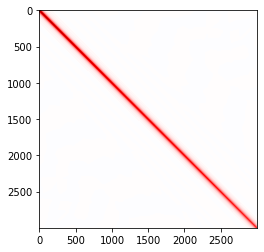

1.7586731414642759e-10 1.7586731414642759e-10


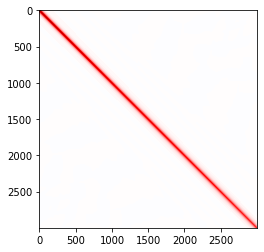

1.6786507583465883e-10 1.6786507583465883e-10


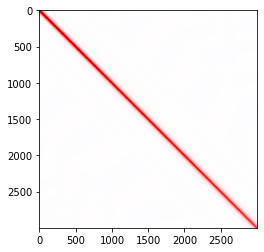

1.6071660142534044e-10 1.6071660142534044e-10


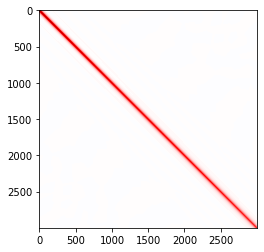

1.5432462451401316e-10 1.5432462451401316e-10


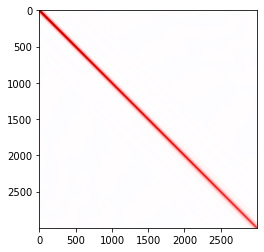

1.4827625733395815e-10 1.4827625733395815e-10


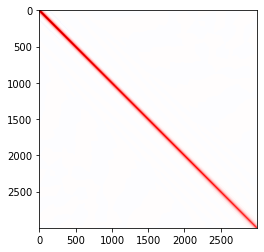

1.41999024642796e-10 1.41999024642796e-10


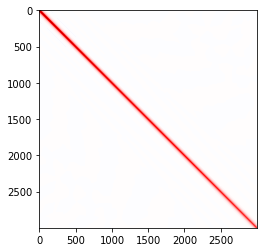

1.3501822377691055e-10 1.3501822377691055e-10


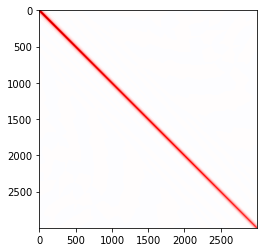

1.273697412905108e-10 1.273697412905108e-10


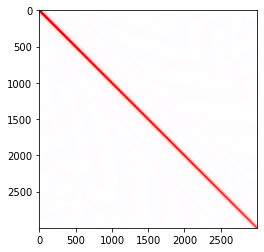

1.197123032927348e-10 1.197123032927348e-10


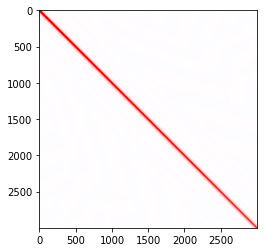

1.127897968926484e-10 1.127897968926484e-10


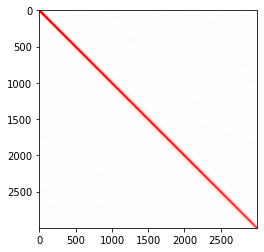

1.0691821651637675e-10 1.0691821651637675e-10


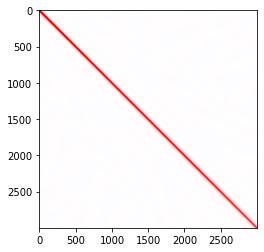

1.0163213850070655e-10 1.0163213850070655e-10


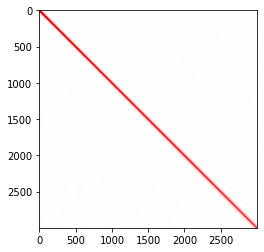

9.611332022306795e-11 9.611332022306795e-11


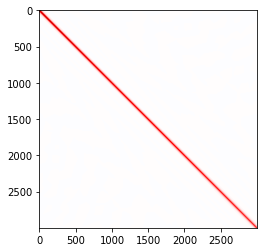

9.008473975207356e-11 9.008473975207356e-11


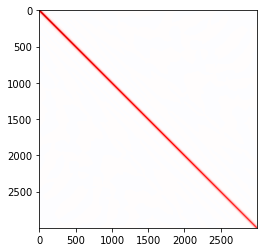

8.415436524714705e-11 8.415436524714705e-11


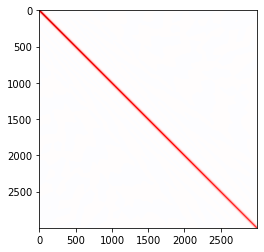

7.901060261966098e-11 7.901060261966098e-11


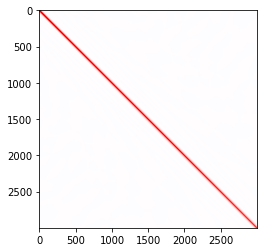

7.443691393938798e-11 7.443691393938798e-11


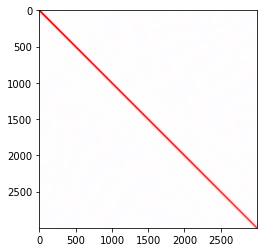

6.974171147400076e-11 6.974171147400076e-11


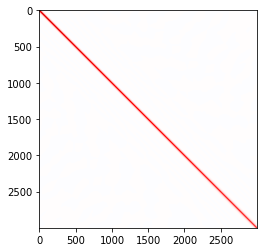

6.496381451934467e-11 6.496381451934467e-11


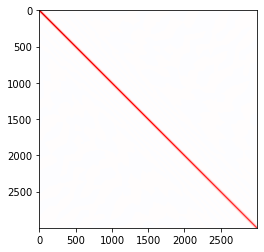

6.066626024557122e-11 6.066626024557122e-11


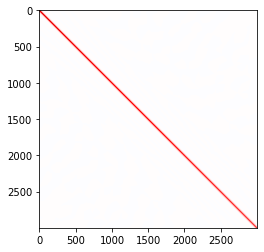

5.6748959138630124e-11 5.6748959138630124e-11


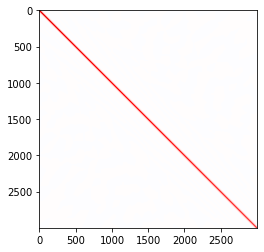

5.2826478004386005e-11 5.2826478004386005e-11


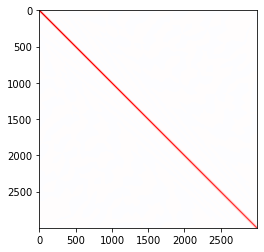

4.912269161358567e-11 4.912269161358567e-11


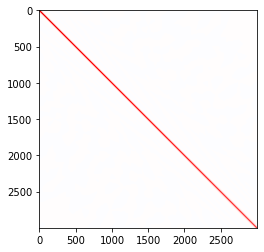

4.573861776101818e-11 4.573861776101818e-11


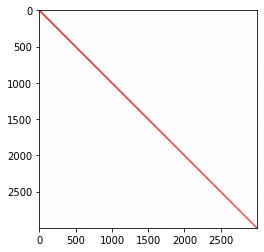

4.246148371279737e-11 4.246148371279737e-11


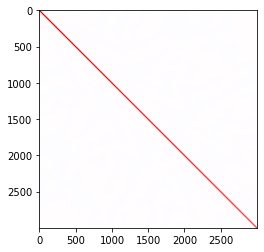

3.9399536828596757e-11 3.9399536828596757e-11


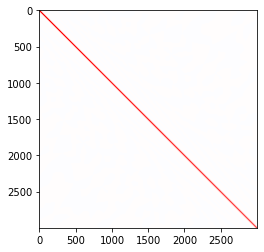

3.6536605407556866e-11 3.6536605407556866e-11


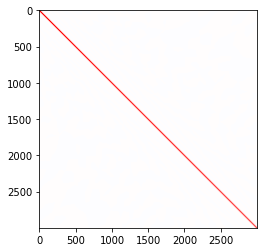

3.382869356764151e-11 3.382869356764151e-11


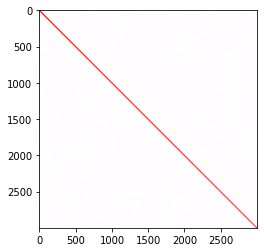

3.130799309784412e-11 3.130799309784412e-11


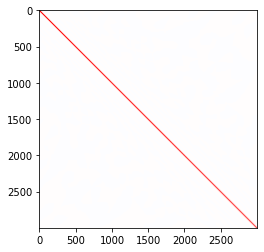

2.8938853874286053e-11 2.8938853874286053e-11


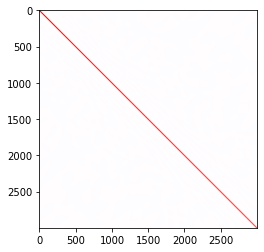

2.6730567237811756e-11 2.6730567237811756e-11


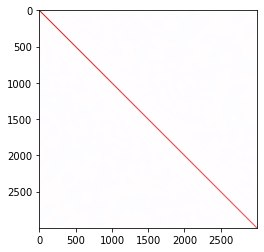

2.466676838429863e-11 2.466676838429863e-11


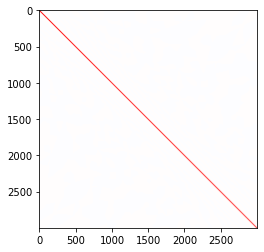

2.27448225978199e-11 2.27448225978199e-11


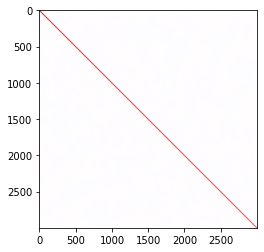

2.0953953846795013e-11 2.0953953846795013e-11


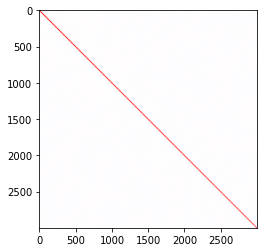

1.928823733456679e-11 1.928823733456679e-11


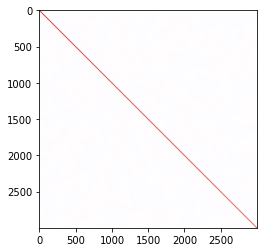

1.7741389192407082e-11 1.7741389192407082e-11


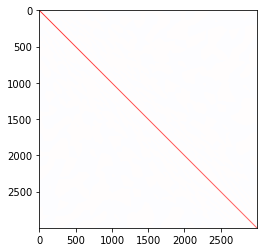

1.630660127300668e-11 1.630660127300668e-11


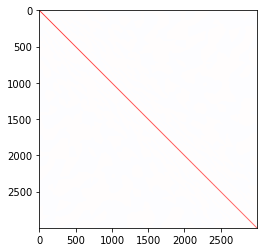

1.497691513624544e-11 1.497691513624544e-11


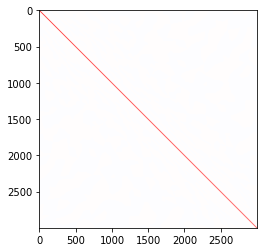

1.3745714948614523e-11 1.3745714948614523e-11


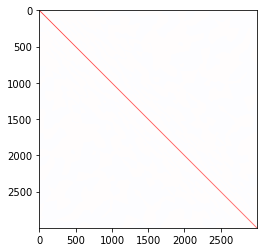

1.2606773193913987e-11 1.2606773193913987e-11


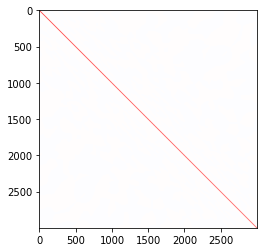

1.1554233348552955e-11 1.1554233348552955e-11


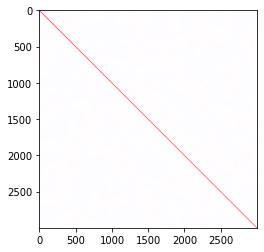

1.0582496861916308e-11 1.0582496861916308e-11


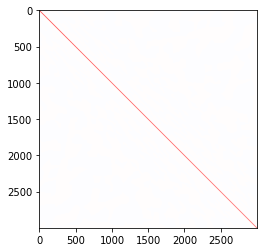

9.686198086041941e-12 9.686198086041941e-12


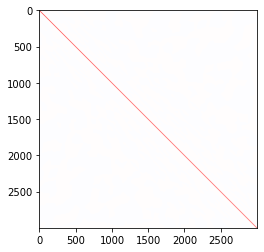

8.86020243819424e-12 8.86020243819424e-12


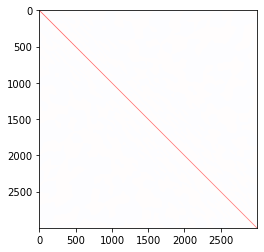

8.099631259646732e-12 8.099631259646732e-12


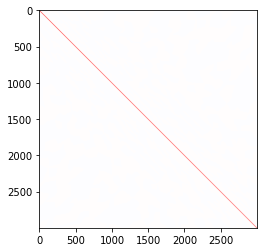

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()